# Plotting the ratios of extensions for empirical vs conjectured values 

### After running the main simulation software, replace the variables below with the output from basic_seed_chainer. 

In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from  math import log
%matplotlib inline

#comment if SciencePlots: https://github.com/garrettj403/SciencePlots 
#is not installed
plt.style.use('science')

#THETA = 0.05 RESULTS
extend_cumulative = [9.90307e-6, 2.2776461e-5, 5.3853437e-5, 0.00012645985, 0.00029559562, 0.0006871595, 0.0015788921, 0.0035975159, 0.008116459, 0.018162133, 0.040367972, 0.089336686]
chain_cumulative = [0.00011849474, 0.00022809266, 0.00042297516, 0.0007981488, 0.0015215854, 0.0029083148, 0.005479027, 0.010641336, 0.021041423, 0.04035635, 0.07846263, 0.14949545]
recov_cumulative = [0.9549738198757765, 0.972571647634584, 0.9833691065292096, 0.9900342205151378, 0.994073940546968, 0.9964912778473091, 0.9979337467887491, 0.9987886770212177, 0.9992949422476871, 0.9995913040805938, 0.9997631469210123, 0.999862674628025]
extend_std = [7.008675e-6, 1.1697969e-5, 2.1310758e-5, 3.7554993e-5, 6.550394e-5, 0.00011369939, 0.00019475246, 0.00033605433, 0.00056885387, 0.0009758512, 0.0019815275, 0.0049380516]

extend_cumulative_sketch = [1.8492483e-5, 5.2108302e-5, 0.00013776781, 0.00036057841, 0.0008924879, 0.0021712033, 0.0051318062, 0.011996759, 0.027493117, 0.06259409, 0.14031939, 0.31279048]
chain_cumulative_sketch = [3.3308643e-5, 4.8850015e-5, 7.621892e-5, 0.00011860382, 0.00018763031, 0.0003003712, 0.00049010274, 0.0008097861, 0.0013871193, 0.0024098312, 0.004175731, 0.0075061903]
recov_cumulative_sketch = [0.9428860559006211, 0.9623469331158239, 0.9760944329896907, 0.9848027474017171, 0.9906528870392389, 0.9942789549436796, 0.9965232395757856, 0.9979025346692553, 0.9987496972793459, 0.999254983337655, 0.9995578471600931, 0.9997404123980111]
extend_std_sketch = [1.1436015e-5, 2.202653e-5, 4.3314743e-5, 8.448755e-5, 0.00015776508, 0.00028558177, 0.0005062684, 0.00089785847, 0.0015427556, 0.002752749, 0.0046988684, 0.0080720745]

#Put in the number of iterations used here and the values of theta.
num_iter = 100000
theta = 0.05


In [5]:
#THETA = 0.10 RESULTS

extend_cumulative = [1.9714422e-5, 4.9105107e-5, 0.00012003104, 0.00028375626, 0.00066064147, 0.0015053438, 0.0033866481, 0.0075210845, 0.01649302, 0.035958964, 0.07767562, 0.1665333]
chain_cumulative = [4.125179e-5, 7.244401e-5, 0.00012153559, 0.00020528142, 0.00034472384, 0.0005863499, 0.0009901817, 0.0016756824, 0.0028720263, 0.0048300233, 0.007989242, 0.013404733]
lower_recov_cumulative = [0.885308787878788, 0.9233349019607843, 0.9489804672897196, 0.9661950692041522, 0.9780840826128722, 0.9857011099252935, 0.990816409724281, 0.9940800016470395, 0.9961909620751177, 0.9975844355207645, 0.9984634373014416, 0.9990227268163349]
extend_std = [1.6752385e-5, 2.7974056e-5, 5.264722e-5, 9.585488e-5, 0.0001733755, 0.00030417717, 0.00052934006, 0.00091724907, 0.0015792811, 0.0026701647, 0.004576147, 0.007837001]

extend_cumulative_sketch = [3.0841496e-5, 8.942789e-5, 0.00024038042, 0.00062127924, 0.0015252979, 0.0036590751, 0.008509493, 0.01951994, 0.043917116, 0.09810172, 0.21557178, 0.47254574]
chain_cumulative_sketch = [9.506589e-6, 1.1883938e-5, 1.7317896e-5, 2.5265725e-5, 3.732217e-5, 5.5787605e-5, 8.283254e-5, 0.00012465341, 0.00018974596, 0.00029263698, 0.00045094063, 0.00070550264]
lower_recov_cumulative_sketch = [0.8532226262626263, 0.8917507563025211, 0.9239655451713396, 0.94661776816609, 0.9634846013448607, 0.9750097865528281, 0.9832319833975689, 0.9886822300914108, 0.9925126089940071, 0.995063347227164, 0.9967556500007059, 0.9978745570355031]
extend_std_sketch = [2.1847423e-5, 4.7839854e-5, 9.945894e-5, 0.00020196394, 0.00039109928, 0.0007455084, 0.0013829666, 0.0025412063, 0.004516602, 0.008140997, 0.014263648, 0.02881221]
#extend_cumulative_sketch = [3.052344e-5, 8.940595e-5, 0.00023953464, 0.000618774, 0.0015200237, 0.003637082, 0.008490546, 0.019471541, 0.043991797, 0.09790831, 0.21549302]
#chain_cumulative_sketch = [9.786944e-6, 1.2141742e-5, 1.749863e-5, 2.5491827e-5, 3.74474e-5, 5.5805936e-5, 8.2181505e-5, 0.00012435857, 0.00019004046, 0.00029221387, 0.00045203033]
#lower_recov_cumulative_sketch = [0.8530464646464646, 0.8914158543417366, 0.9236080062305295, 0.9465487197231833, 0.9634031604226705, 0.9750322572038421, 0.9832380047435517, 0.9887495223585605, 0.9925319657806853, 0.9950365882173537, 0.9967484502209735]
#extend_std_sketch = [2.1375396e-5, 4.745349e-5, 9.916565e-5, 0.00020151101, 0.00039177557, 0.00074256107, 0.0013808871, 0.0025210513, 0.0045590913, 0.008080169, 0.01424684]

#Put in the number of iterations used here and the values of theta.
num_iter = 50000
theta = 0.10

0.42399845327747493 2.3584991696787525 1.9999999999999998 0.17924958483937609
[[0.02219904 0.01534393 0.01143715 0.00870942 0.0066033  0.00503067
  0.00385508 0.00297795 0.00231418 0.00179384 0.00141643]
 [0.02247543 0.01546583 0.01150704 0.00875024 0.00662742 0.00504478
  0.00386341 0.00298296 0.00231726 0.00179567 0.00141758]]


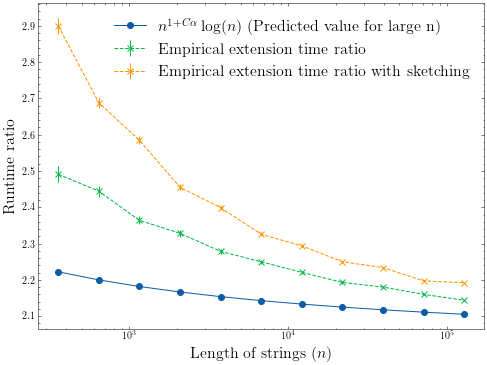

In [3]:
alpha = -log(1 - theta)/log(4)
c = 2/(1 - 2 * alpha)
ci = 1 / c
base = 4**(ci)
rat_al = (4**(ci))**(1 + c * alpha)
rat_chain = (4**(ci))**(1 - c * alpha)
print(ci, c, rat_al, c*alpha)
start = 9

t = scipy.stats.t.ppf((1 + 0.95) / 2., num_iter-1)

#a is iteration i+1, b is iteration i. The ratio is what we're plotting.
a = np.array([extend_cumulative[i] for i in range(1,len(extend_cumulative))])
b = np.array([extend_cumulative[i] for i in range(len(extend_cumulative)-1)])

#We use Fieller's method https://en.wikipedia.org/wiki/Fieller%27s_theorem to compute
#confidence intervals for ratios of data. 
sem_b = np.array([extend_std[i]/ np.sqrt(num_iter) for i in range(len(extend_cumulative)-1)])
one = np.ones(len(sem_b))
sem_a = np.array([extend_std[i] / np.sqrt(num_iter) for i in range(1,len(extend_cumulative))])
g = (t * sem_b / b)**2
Q = a/b
seq = Q/(one - g) * np.sqrt((one - g) * sem_a**2 / a**2 + sem_b**2 / b**2)
conf = np.array([Q/(one - g) - t * seq, Q/(one - g) + t * seq])

#Same thing for sketched ata.
a_s = np.array([extend_cumulative_sketch[i] for i in range(1,len(extend_cumulative_sketch))])
b_s = np.array([extend_cumulative_sketch[i] for i in range(len(extend_cumulative_sketch)-1)])
sem_b_s = np.array([extend_std_sketch[i]/ np.sqrt(num_iter) for i in range(len(extend_cumulative_sketch)-1)])
sem_a_s = np.array([extend_std_sketch[i] / np.sqrt(num_iter) for i in range(1,len(extend_cumulative_sketch))])
g_s = (t * sem_b_s / b_s)**2
Q_s = a_s/b_s
seq_s = Q_s/(one - g_s) * np.sqrt((one - g_s) * sem_a_s**2 / a_s**2 + sem_b_s**2 / b_s**2)
conf_s = np.array([Q_s/(one - g_s) - t * seq_s, Q_s/(one - g_s) + t * seq_s])


#The values of n_{k+1} are 4^((k+1)/C) so that Clog4(n_k) = k + 1, i.e. k is an integer value. 
n_axis = [int(4**(ci* x)) for x in range(start+1,len(extend_cumulative)-1 + start+1)]

plt.figure(figsize=(8, 6))

##Plotting the ratios of extension times for empirical extension runtimes
extend_ratio = np.array([extend_cumulative[i+1]/extend_cumulative[i] for i in range(len(extend_cumulative)-1)])
extend_ratio_sketch = np.array([extend_cumulative_sketch[i+1]/extend_cumulative_sketch[i] for i in range(len(extend_cumulative_sketch)-1)])
conf = np.abs(conf - Q)
print(conf)

##Plotting the ratios of extension times conjectured with n^(1+f(theta)) log^1 n 
align_ratio_guess1 = [rat_al*(log(base**(i+start+1))/log(base**(i+start)))**1 for i in range(len(extend_cumulative)-1)]


#plt.plot(n_axis,align_ratio_guess, 'o-' , label=r"$n^{1+C \alpha} \log^2(n)$  ")
plt.plot(n_axis,align_ratio_guess1, 'o-' , label=r"$n^{1+C \alpha} \log(n)$ (Predicted value for large n) ")
plt.errorbar(n_axis,extend_ratio, fmt = 'x--', yerr = conf,  label="Empirical extension time ratio")
plt.errorbar(n_axis,extend_ratio_sketch,fmt = 'x--', yerr = conf,  label="Empirical extension time ratio with sketching")
plt.ylabel("Runtime ratio", fontsize = 16)
plt.xlabel(r"Length of strings $(n)$", fontsize = 16)
plt.xscale('log')
plt.legend(fontsize=16)
#plt.xticks(np.arange(len(extend_cumulative)), [int(4**(ci* x)) for x in range(start,len(extend_cumulative)-1 + start+1)])
#plt.savefig('theta_0.05_empirical_runtime.pdf')  
plt.show()


# Plotting chaining time vs extension times

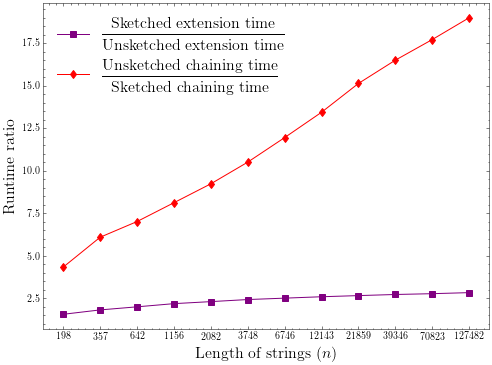

[1.5644128952905647, 1.8211525330756333, 2.002652147311229, 2.1894820575940774, 2.3088134324961467, 2.4307238652060748, 2.5126593459769264, 2.5953624108331717, 2.662769826265899, 2.7281575742838418, 2.7752823859017797, 2.8375450435438436] [4.339284048148079, 6.095959941898047, 7.017918920404648, 8.124897266949594, 9.236436145058018, 10.510397426094919, 11.954018312127092, 13.4427321322377, 15.13616574497818, 16.505170672551362, 17.716837801907538, 19.000259162743884]


In [4]:
plt.style.use('science')
    
alpha = -log(1 - theta)/log(4)
c = 2/(1 - 2 * alpha)
ci = 1 / c
start = 9

plt.figure(figsize=(8, 6))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ratio = [extend_cumulative_sketch[i] / extend_cumulative[i] for i in range(len(extend_cumulative))]
ratio_chain = [chain_cumulative[i] / chain_cumulative_sketch[i] for i in range(len(extend_cumulative))]
plt.plot((ratio),'s-', color='purple',label = r"$$\frac{\text{Sketched extension time}}{\text{Unsketched extension time}}$$");
plt.plot((ratio_chain),'d-', color='red',label=r"$$\frac{\text{Unsketched chaining time}}{\text{Sketched chaining time}}$$");
#plt.title(r"Sketching with density $1/c = \frac{1}{\frac{2}{1 - 2 \alpha} \log n - 6}$", fontsize=16)
#plt.title(r"$\theta$ = 0.05")
plt.xticks(np.arange(len(extend_cumulative)), [int(4**(ci* x)) for x in range(start,len(extend_cumulative)-1 + start+1)])
plt.legend(fontsize=16)
plt.xlabel(r"Length of strings $(n)$", fontsize = 16)
plt.ylabel(r"Runtime ratio", fontsize = 16)
plt.savefig('theta_0.05_ratios.pdf')  
plt.show()

#plt.savefig('theta_0.05_empirical_runtime.pdf')  
print(ratio, ratio_chain)
